In [5]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [6]:
import shap

# Preprocessing

In [7]:
df = pd.read_csv("greenhouse.csv")
df.rename({"country_or_area": "country"}, axis=1, inplace=True)
le = LabelEncoder()
df["category_encoded"] = le.fit_transform(df["category"])
df["country_encoded"] = le.fit_transform(df["country"])
df.country_encoded= le.fit_transform(df.country)
X = df.drop(["category", "category_encoded", "country"], axis=1) ## X contains values and year and category
y = df["category_encoded"].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


In [8]:
df.head()

,country,year,value,category,category_encoded,country_encoded
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0


In [9]:
df[(df.country == "Australia") & (df.year == 2014)]

,country,year,value,category,category_encoded,country_encoded
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0
1074,Australia,2014,522397.090711,greenhouse_gas_ghgs_emissions_including_indire...,1,0
2023,Australia,2014,522397.090711,greenhouse_gas_ghgs_emissions_without_land_use...,2,0
3097,Australia,2014,10787.350138,hydrofluorocarbons_hfcs_emissions_in_kilotonne...,3,0
4072,Australia,2014,98076.109401,methane_ch4_emissions_without_land_use_land_us...,4,0
5394,Australia,2014,20084.542834,nitrous_oxide_n2o_emissions_without_land_use_l...,6,0
6468,Australia,2014,192.535991,perfluorocarbons_pfcs_emissions_in_kilotonne_c...,7,0
7299,Australia,2014,129.605354,sulphur_hexafluoride_sf6_emissions_in_kilotonn...,8,0


# Decision tree model

In [10]:
len(df.category.unique())


10

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Tune the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)


print (f"accuracy: {accuracy_score(Y_test, y_pred) * 100} %")

accuracy: 67.53864447086801 %


In [12]:
len(df)

8406

In [13]:
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")
#model.fit(X_train, y_train_encoded, epochs=1000, batch_size=64)

In [14]:
## Categorising the types of emission

df.head()

,country,year,value,category,category_encoded,country_encoded
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0


In [15]:
df.category.unique()

array(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent',
       'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],
      dtype=obj

In [16]:
## How can I divide these categories?

# Maybe I can sort countries into regions, such as "Europe", "baltics", "North america", "middle east", "Asia"


europe = [""]

In [17]:
df.country.unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [18]:
countries = {
    'Australia': 'Australia',
    'Austria': 'Europe',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Bulgaria': 'Europe',
    'Canada': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Estonia': 'Europe',
    'European Union': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Latvia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Monaco': 'Europe',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Turkey': 'Asia',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States of America': 'North America'
}

directions = {
    'Australia': 'South',
    'Austria': 'West',
    'Belarus': 'North East',
    'Belgium': 'North West',
    'Bulgaria': 'North',
    'Canada': 'North West',
    'Croatia': 'North',
    'Cyprus': 'South East',
    'Czech Republic': 'North',
    'Denmark': 'North',
    'Estonia': 'North East',
    'European Union': 'North West',
    'Finland': 'North East',
    'France': 'North West',
    'Germany': 'North West',
    'Greece': 'South East',
    'Hungary': 'North',
    'Iceland': 'North',
    'Ireland': 'North West',
    'Italy': 'South',
    'Japan': 'East',
    'Latvia': 'North East',
    'Liechtenstein': 'West',
    'Lithuania': 'North East',
    'Luxembourg': 'North West',
    'Malta': 'South',
    'Monaco': 'South West',
    'Netherlands': 'North West',
    'New Zealand': 'South East',
    'Norway': 'North',
    'Poland': 'North',
    'Portugal': 'South West',
    'Romania': 'North',
    'Russian Federation': 'North East',
    'Slovakia': 'North',
    'Slovenia': 'North',
    'Spain': 'South',
    'Sweden': 'North',
    'Switzerland': 'West',
    'Turkey': 'South',
    'Ukraine': 'North East',
    'United Kingdom': 'North West',
    'United States of America': 'West'
}


capitals = {
    'Australia': 'Canberra',
    'Austria': 'Vienna',
    'Belarus': 'Minsk',
    'Belgium': 'Brussels',
    'Bulgaria': 'Sofia',
    'Canada': 'Ottawa',
    'Croatia': 'Zagreb',
    'Cyprus': 'Nicosia',
    'Czech Republic': 'Prague',
    'Denmark': 'Copenhagen',
    'Estonia': 'Tallinn',
    'European Union': '',  # No specific capital as it is an organization
    'Finland': 'Helsinki',
    'France': 'Paris',
    'Germany': 'Berlin',
    'Greece': 'Athens',
    'Hungary': 'Budapest',
    'Iceland': 'Reykjavik',
    'Ireland': 'Dublin',
    'Italy': 'Rome',
    'Japan': 'Tokyo',
    'Latvia': 'Riga',
    'Liechtenstein': 'Vaduz',
    'Lithuania': 'Vilnius',
    'Luxembourg': 'Luxembourg City',
    'Malta': 'Valletta',
    'Monaco': 'Monaco',
    'Netherlands': 'Amsterdam',
    'New Zealand': 'Wellington',
    'Norway': 'Oslo',
    'Poland': 'Warsaw',
    'Portugal': 'Lisbon',
    'Romania': 'Bucharest',
    'Russian Federation': 'Moscow',
    'Slovakia': 'Bratislava',
    'Slovenia': 'Ljubljana',
    'Spain': 'Madrid',
    'Sweden': 'Stockholm',
    'Switzerland': 'Bern',
    'Turkey': 'Ankara',
    'Ukraine': 'Kyiv',
    'United Kingdom': 'London',
    'United States of America': 'Washington, D.C.'
}

languages = {
    'Australia': 'English',
    'Austria': 'German',
    'Belarus': 'Belarusian and Russian',
    'Belgium': 'Dutch, French, and German',
    'Bulgaria': 'Bulgarian',
    'Canada': 'English and French',
    'Croatia': 'Croatian',
    'Cyprus': 'Greek and Turkish',
    'Czech Republic': 'Czech',
    'Denmark': 'Danish',
    'Estonia': 'Estonian',
    'European Union': '',  # No specific national language as it is an organization
    'Finland': 'Finnish and Swedish',
    'France': 'French',
    'Germany': 'German',
    'Greece': 'Greek',
    'Hungary': 'Hungarian',
    'Iceland': 'Icelandic',
    'Ireland': 'Irish and English',
    'Italy': 'Italian',
    'Japan': 'Japanese',
    'Latvia': 'Latvian',
    'Liechtenstein': 'German',
    'Lithuania': 'Lithuanian',
    'Luxembourg': 'Luxembourgish, French, and German',
    'Malta': 'Maltese and English',
    'Monaco': 'French',
    'Netherlands': 'Dutch',
    'New Zealand': 'English, Māori, and New Zealand Sign Language',
    'Norway': 'Norwegian',
    'Poland': 'Polish',
    'Portugal': 'Portuguese',
    'Romania': 'Romanian',
    'Russian Federation': 'Russian',
    'Slovakia': 'Slovak',
    'Slovenia': 'Slovene',
    'Spain': 'Spanish',
    'Sweden': 'Swedish',
    'Switzerland': 'German, French, Italian, and Romansh',
    'Turkey': 'Turkish',
    'Ukraine': 'Ukrainian',
    'United Kingdom': 'English',
    'United States of America': 'English'
}

df["region"] = [countries[i] for i in df.country]
df["directions"] = [directions[i] for i in df.country]
df["capitals"] = [capitals[i] for i in df.country]
df["official_language"] = [languages[i] for i in df.country]


In [19]:
df.head()

,country,year,value,category,category_encoded,country_encoded,region,directions,capitals,official_language
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0,Australia,South,Canberra,English
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0,Australia,South,Canberra,English
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0,Australia,South,Canberra,English
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0,Australia,South,Canberra,English
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0,Australia,South,Canberra,English


In [20]:
df["region_encoded"] = le.fit_transform(df["region"])
df['directions_encoded'] = le.fit_transform(df["directions"])
df["capitals_encoded"] = le.fit_transform(df["capitals"])
df["official_language_encoded"] = le.fit_transform(df["official_language"])

<Axes: xlabel='year', ylabel='value'>

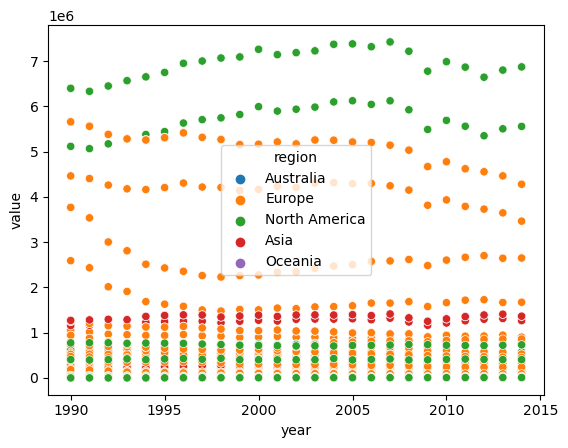

In [21]:
sns.scatterplot(x="year", y="value", hue="region", data=df)

In [22]:
df.country.unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [23]:
df.head()

,country,year,value,category,category_encoded,country_encoded,region,directions,capitals,official_language,region_encoded,directions_encoded,capitals_encoded,official_language_encoded
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0,Australia,South,Canberra,English,1,4,10,8
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0,Australia,South,Canberra,English,1,4,10,8
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0,Australia,South,Canberra,English,1,4,10,8
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0,Australia,South,Canberra,English,1,4,10,8
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0,Australia,South,Canberra,English,1,4,10,8


# New ModeL

In [24]:
X = df.drop(["country", "country_encoded", "category", "region", "directions", "capitals", "capitals_encoded", "official_language", "region_encoded", "directions_encoded"], axis=1)
y = df.country_encoded.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print (f"accuracy: {accuracy_score(Y_test, pred) * 100} %")

## Improved accuracy





accuracy: 99.0487514863258 %


In [35]:
## Training accuracy

train_pred = clf.predict(X_train)

print (f"accuracy: {accuracy_score(Y_train, train_pred) * 100} %")

accuracy: 100.0 %


In [25]:
import shap

explainer = shap.Explainer(clf)
shap_values = explainer(X)

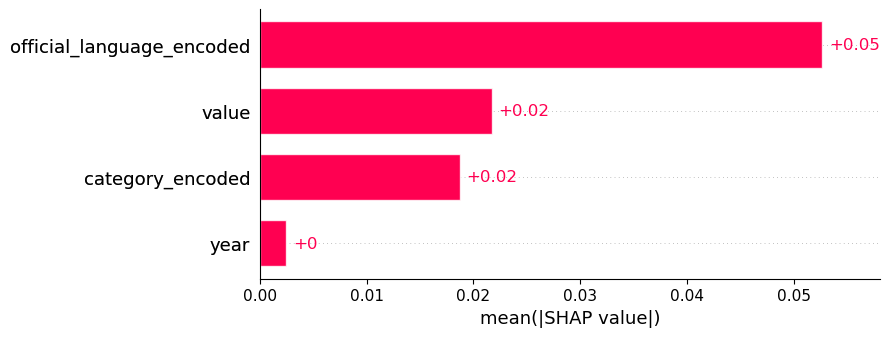

In [36]:
shap.plots.bar(shap_values[:, :, 0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


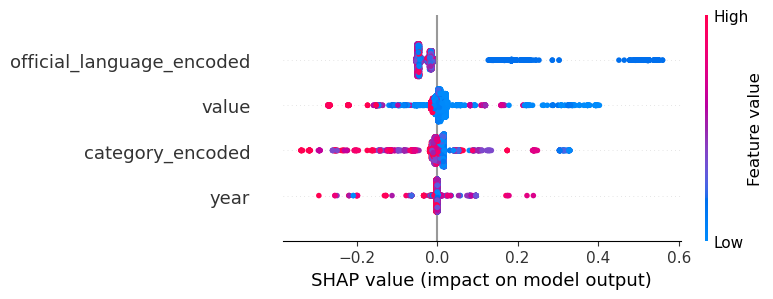

In [44]:
shap.summary_plot(shap_values[:, :, 0], X)

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

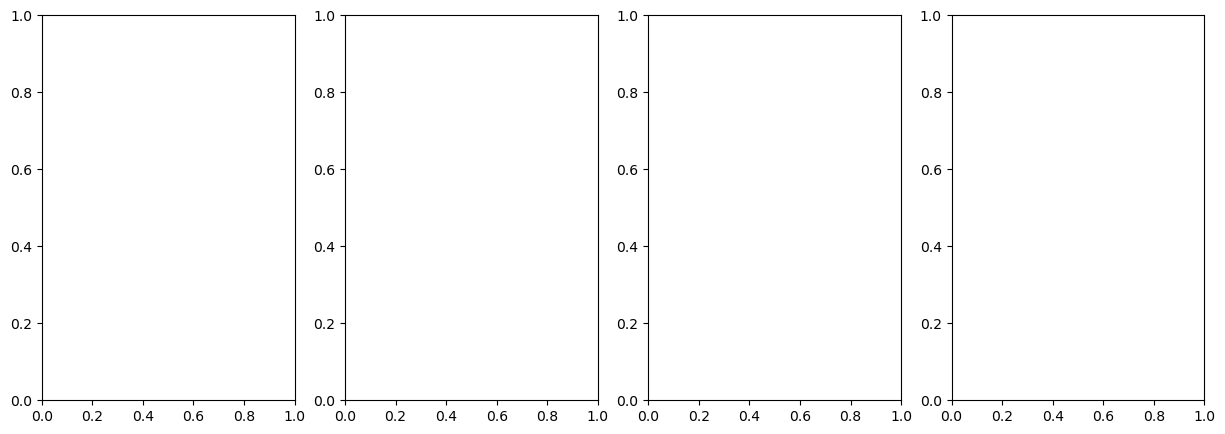

In [47]:
shap.plots.scatter(shap_values[:, :, 0], X)